# Palmer Penguins
***
This notebook contains my analysis of the famous palmer penguins dataset.

The dataset is avalible in [on GitHub]

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

## Imports
****

We use pandas for the DataFrame data strucuture.

It allows us to investigate CSV files, amongst other features.

### Load Data
***

Load the palmer penguins data set from a URL.

In [59]:
# Data frames.
import pandas as pd

# Numerical arrays and rando numbers.
import numpy as np

# Plot.
import matplotlib.pyplot as plt


import seaborn as sns


We will be using scikit-learn to do Principal Component Analysis with Penguins data. Let us load PCA module from scikit-learn. We will be using scikit-learn’s ability chain together multiple steps of analysis using “pipeline”.

In [60]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [74]:
#  Load the penguins data set.
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it.

In [71]:
# Let's have a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset you’ve provided appears to be related to penguins. It contains information about various penguin species observed in the Palmer Archipelago, Antarctica. Let’s explore this data further:

Species: The dataset includes three different species of penguins: Adelie, Chinstrap, and Gentoo.
Island: Penguins were collected from three different islands in the Palmer Archipelago: Torgersen, Biscoe, and Dream.
Bill Length (mm): The length of the penguin’s bill in millimeters.
Bill Depth (mm): The depth of the penguin’s bill in millimeters.
Flipper Length (mm): The length of the penguin’s flipper in millimeters.
Body Mass (g): The body mass of the penguin in grams.
Sex: The gender of the penguin (either male or female).
Year: The year when the data was collected.
Here are a few examples from the dataset:

Penguin 1 (Adelie, Torgersen):
Bill Length: 39.1 mm
Bill Depth: 18.7 mm
Flipper Length: 181 mm
Body Mass: 3750 g
Sex: Male
Year: 2007
Penguin 2 (Adelie, Torgersen):
Bill Length: 39.5 mm
Bill Depth: 17.4 mm
Flipper Length: 186 mm
Body Mass: 3800 g
Sex: Female
Year: 2007
Penguin 3 (Adelie, Torgersen):
Bill Length: 40.3 mm
Bill Depth: 18.0 mm
Flipper Length: 195 mm
Body Mass: 3250 g
Sex: Female
Year: 2007
The dataset contains data for a total of 344 penguins across the three species and islands. It’s a great dataset for data exploration and visualization, and it serves as an alternative to the famous iris dataset1.

If you have any specific questions or would like to explore more aspects of this dataset, feel free to ask!

### Inspect Data

In [80]:
# Look at the first row.
df.iloc[0] 

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [81]:
# Sex of penguins.
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [82]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [83]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [84]:
# Describe body mass
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [85]:
# Get the counts.
values, counts = np.unique('sex', return_counts=True)

# Show.
values, counts

(array(['sex'], dtype='<U3'), array([1], dtype=int64))

<BarContainer object of 1 artists>

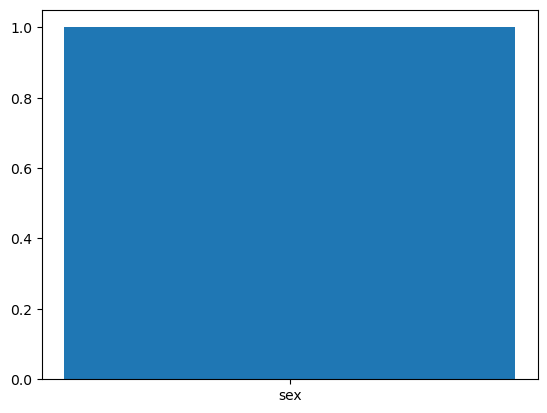

In [86]:
# Plot the bar chart.
plt.bar(values, counts)

In [88]:
columns_of_interest = ['Species', "Culmen Length (mm)", "Culmen Length (mm)", 
                       "Flipper Length (mm)", "Body Mass (g)", "Sex"]
penguins_df = penguins_raw.loc[:,columns_of_interest]

NameError: name 'penguins_raw' is not defined

In [87]:
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC2",
                    data=pc_df, 
                    hue="Species",
                    style="Sex",
                    s=100)

NameError: name 'pc_df' is not defined

<Figure size 1200x1000 with 0 Axes>

# This will be big

 You *might* have a paragraph. 
 Paragraphs have sentences.
 You **might** have a paragraph. 
 Paragraphs have sentences. You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences.You might have a paragraph. Paragraphs have sentences. 

 If you want a second paragraph, leave a lank line!IIf you want a second paragraph, leave a lank line!f you want a second paragraph, leave a lank line!

## This will be slightly smaller

* Bullet
* Point
- Lists

### This will be slightty smaller again 

1. Numbered bullets.
2. Just use numbers.
2. What a mess.
3. How complex!

#### This will be slightty smaller again again 

black code
> The defintion of stupidity is doing the same thing twice and expecting diffents results! 

##### This will be slightty smaller again again again 

## Tables 
***
|Species  |Bill Length (mm)|Body Mass (g)|
|---------|---------------:|------------:|
|Adelie   |            38.8|         3701|
|Chinstrap|            48.8|         3733|
|Gentoo   |            47.5|         5076|

``` Python
print("python is a great languange!")

a = a + 1

print(a)
```

###### This will be slightty smaller again again again again 




## Math
***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=o}^ {n-1} x_i} {n}$

***
### End